# POS Analysis

In [3]:
import pandas as pd

## Get and Clean Data

In [4]:
listing_pos= pd.read_csv('pos_count_wprice.csv')

In [5]:
listing_pos.head()

,Unnamed: 0,id,price,name_TC,name_SC,description_TC,description_SC,neighborhood_overview_TC,neighborhood_overview_SC,host_about_TC,...,noun_count_neighborhood_overview,noun_count_host_about,adj_count_name,adj_count_description,adj_count_neighborhood_overview,adj_count_host_about,verb_count_host_about,verb_count_name,verb_count_description,verb_count_neighborhood_overview
0,0,183319.0,152.0,5,1,159,13,19,1,58,...,3,15,0,25,1,4,5,0,9,1
1,1,51307.0,75.0,10,2,184,17,21,2,59,...,7,16,0,23,5,5,2,0,7,2
2,2,184314.0,125.0,8,1,170,15,51,3,13,...,11,4,2,34,4,0,0,1,8,2
3,3,51498.0,189.0,9,1,191,9,13,1,100,...,3,11,2,22,1,7,9,0,13,1
4,4,109.0,115.0,7,1,171,11,0,0,281,...,0,74,3,33,0,14,24,1,8,0


In [6]:
listing_pos.columns

Index(['Unnamed: 0', 'id', 'price', 'name_TC', 'name_SC', 'description_TC',
       'description_SC', 'neighborhood_overview_TC',
       'neighborhood_overview_SC', 'host_about_TC', 'host_about_SC',
       'noun_count_name', 'noun_count_description',
       'noun_count_neighborhood_overview', 'noun_count_host_about',
       'adj_count_name', 'adj_count_description',
       'adj_count_neighborhood_overview', 'adj_count_host_about',
       'verb_count_host_about', 'verb_count_name', 'verb_count_description',
       'verb_count_neighborhood_overview'],
      dtype='object')

In [7]:
listing_pos= listing_pos.drop(columns= ['Unnamed: 0', 'id'])

In [8]:
listing_pos.head()

,price,name_TC,name_SC,description_TC,description_SC,neighborhood_overview_TC,neighborhood_overview_SC,host_about_TC,host_about_SC,noun_count_name,...,noun_count_neighborhood_overview,noun_count_host_about,adj_count_name,adj_count_description,adj_count_neighborhood_overview,adj_count_host_about,verb_count_host_about,verb_count_name,verb_count_description,verb_count_neighborhood_overview
0,152.0,5,1,159,13,19,1,58,5,2,...,3,15,0,25,1,4,5,0,9,1
1,75.0,10,2,184,17,21,2,59,4,1,...,7,16,0,23,5,5,2,0,7,2
2,125.0,8,1,170,15,51,3,13,3,1,...,11,4,2,34,4,0,0,1,8,2
3,189.0,9,1,191,9,13,1,100,5,1,...,3,11,2,22,1,7,9,0,13,1
4,115.0,7,1,171,11,0,0,281,10,3,...,0,74,3,33,0,14,24,1,8,0


In [9]:
listing_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45214 entries, 0 to 45213
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   price                             45214 non-null  float64
 1   name_TC                           45214 non-null  int64  
 2   name_SC                           45214 non-null  int64  
 3   description_TC                    45214 non-null  int64  
 4   description_SC                    45214 non-null  int64  
 5   neighborhood_overview_TC          45214 non-null  int64  
 6   neighborhood_overview_SC          45214 non-null  int64  
 7   host_about_TC                     45214 non-null  int64  
 8   host_about_SC                     45214 non-null  int64  
 9   noun_count_name                   45214 non-null  int64  
 10  noun_count_description            45214 non-null  int64  
 11  noun_count_neighborhood_overview  45214 non-null  int64  
 12  noun

# Linear Regression

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from dmba import regressionSummary
from dmba import adjusted_r2_score

In [325]:
#predictors
X= listing_pos[[
       'noun_count_name', 'noun_count_description',
       'noun_count_neighborhood_overview', 'noun_count_host_about',
       'adj_count_name', 'adj_count_description',
       'adj_count_neighborhood_overview', 'adj_count_host_about',
       'verb_count_name', 'verb_count_description',
       'verb_count_neighborhood_overview', 'verb_count_host_about',
       'name_TC', 'name_SC',
       'description_TC', 'description_SC',
       'neighborhood_overview_TC',
       'neighborhood_overview_SC', 'host_about_TC',
       'host_about_SC']]
#outcome
y= listing_pos['price']

## Missing Values

In [317]:
listing_pos.isnull().sum()

price                               0
name_TC                             0
name_SC                             0
description_TC                      0
description_SC                      0
neighborhood_overview_TC            0
neighborhood_overview_SC            0
host_about_TC                       0
host_about_SC                       0
noun_count_name                     0
noun_count_description              0
noun_count_neighborhood_overview    0
noun_count_host_about               0
adj_count_name                      0
adj_count_description               0
adj_count_neighborhood_overview     0
adj_count_host_about                0
verb_count_host_about               0
verb_count_name                     0
verb_count_description              0
verb_count_neighborhood_overview    0
dtype: int64

## Partition Data

In [326]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.2)

## Train Model

In [327]:
price_predictor= LinearRegression()
price_predictor.fit(train_X,train_y)

LinearRegression()

In [328]:
print('intercept ', price_predictor.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': price_predictor.coef_}))

# print performance measures
regressionSummary(train_y, price_predictor.predict(train_X))

intercept  152.38042197644043
                           Predictor  coefficient
0                    noun_count_name     6.142142
1             noun_count_description     4.292716
2   noun_count_neighborhood_overview    -0.792114
3              noun_count_host_about     0.695401
4                     adj_count_name   -17.765341
5              adj_count_description     3.135546
6    adj_count_neighborhood_overview    -3.982773
7               adj_count_host_about    -2.777646
8                    verb_count_name    -0.068929
9             verb_count_description     4.216352
10  verb_count_neighborhood_overview     3.688159
11             verb_count_host_about     0.692774
12                           name_TC     5.985432
13                           name_SC     9.560878
14                    description_TC    -1.185706
15                    description_SC    -6.058921
16          neighborhood_overview_TC     0.147816
17          neighborhood_overview_SC    -2.203831
18                  

## Test Model using Training Set

In [329]:
predict_y= price_predictor.predict(train_X)

print('adjusted_r2: ', adjusted_r2_score(train_y,predict_y,price_predictor) )

adjusted_r2:  0.03829045659760755


In [330]:
price_predict = price_predictor.predict(valid_X)
result= pd.DataFrame({'predicted' : price_predict, 'actual': valid_y, 'residual': valid_y-price_predict})
result.head(20)

,predicted,actual,residual
8119,237.494470,250.0,12.505530
12292,246.564029,125.0,-121.564029
23855,174.131522,99.0,-75.131522
36738,188.134599,22.0,-166.134599
28187,221.555302,120.0,-101.555302
284,208.300586,67.0,-141.300586
19210,186.607586,165.0,-21.607586
37218,210.893295,175.0,-35.893295
39816,258.784516,175.0,-83.784516
10540,237.237502,82.0,-155.237502


## Performance

In [331]:
regression_summary= regressionSummary(valid_y,price_predict)


Regression statistics

                      Mean Error (ME) : -0.3345
       Root Mean Squared Error (RMSE) : 252.7314
            Mean Absolute Error (MAE) : 153.5620
          Mean Percentage Error (MPE) : -91.7435
Mean Absolute Percentage Error (MAPE) : 114.9941


In [332]:
r2= r2_score(valid_y, price_predict)
MSE= mean_squared_error(valid_y,price_predict)
print('  r2 score: ', r2,
      'MSE: ', MSE)

  r2 score:  0.046069316650329095 MSE:  63873.1447498258


## Get Pearson Correlation for Feature Selection

In [49]:
pos_correlation= listing_pos.corr()

In [50]:
pos_correlation

,price,name_TC,name_SC,description_TC,description_SC,neighborhood_overview_TC,neighborhood_overview_SC,host_about_TC,host_about_SC,noun_count_name,...,noun_count_neighborhood_overview,noun_count_host_about,adj_count_name,adj_count_description,adj_count_neighborhood_overview,adj_count_host_about,verb_count_host_about,verb_count_name,verb_count_description,verb_count_neighborhood_overview
price,1.000000,0.087481,0.033488,0.075893,0.006390,-0.002529,-0.012026,0.011709,-0.002882,0.090874,...,-0.001388,0.020103,-0.039824,0.071835,-0.017217,-0.001212,0.015920,0.028551,0.069159,0.011477
name_TC,0.087481,1.000000,0.313710,0.248183,0.154464,0.111000,0.087853,0.142418,0.124672,0.582276,...,0.109521,0.141404,0.301688,0.189292,0.092120,0.130226,0.141024,0.176614,0.229809,0.101640
name_SC,0.033488,0.313710,1.000000,0.101875,0.098047,0.048217,0.035965,0.054278,0.063821,0.129823,...,0.052318,0.041460,0.077840,0.082509,0.029523,0.055574,0.059126,0.087820,0.083548,0.032069
description_TC,0.075893,0.248183,0.101875,1.000000,0.774410,0.431591,0.420814,0.241126,0.228114,0.151222,...,0.413149,0.231272,0.072786,0.818735,0.406540,0.218669,0.243115,0.055064,0.815466,0.373929
description_SC,0.006390,0.154464,0.098047,0.774410,1.000000,0.306309,0.366955,0.136934,0.159748,0.089281,...,0.286248,0.119553,0.065382,0.637427,0.290103,0.111129,0.147821,0.031400,0.612516,0.266118
neighborhood_overview_TC,-0.002529,0.111000,0.048217,0.431591,0.306309,1.000000,0.889130,0.243078,0.222345,0.049376,...,0.971718,0.231598,0.018638,0.425920,0.910381,0.259038,0.217493,0.001388,0.350973,0.873981
neighborhood_overview_SC,-0.012026,0.087853,0.035965,0.420814,0.366955,0.889130,1.000000,0.218459,0.215384,0.040030,...,0.839709,0.205411,0.010277,0.401871,0.821668,0.220678,0.199775,-0.000911,0.338540,0.809042
host_about_TC,0.011709,0.142418,0.054278,0.241126,0.136934,0.243078,0.218459,1.000000,0.948086,0.060228,...,0.229908,0.968799,-0.003727,0.199055,0.238478,0.933205,0.959017,0.033903,0.279912,0.234201
host_about_SC,-0.002882,0.124672,0.063821,0.228114,0.159748,0.222345,0.215384,0.948086,1.000000,0.044231,...,0.207353,0.887457,-0.003312,0.184030,0.217122,0.902100,0.913015,0.038021,0.258795,0.216906
noun_count_name,0.090874,0.582276,0.129823,0.151222,0.089281,0.049376,0.040030,0.060228,0.044231,1.000000,...,0.054394,0.065851,0.086809,0.125054,0.042168,0.053572,0.065061,-0.027688,0.123455,0.041622


In [56]:
price_pos_corr= pd.DataFrame(pos_correlation[:1])

In [57]:
price_pos_corr= price_pos_corr.transpose()

In [ ]:
price_pos_corr= price_pos_corr.sort_values('price', ascending= False)
price_pos_corr= price_pos_corr.rename(columns={'price': 'corr_to_price'})

In [67]:
price_pos_corr

,corr_to_price
price,1.000000
noun_count_description,0.106512
noun_count_name,0.090874
name_TC,0.087481
description_TC,0.075893
adj_count_description,0.071835
verb_count_description,0.069159
name_SC,0.033488
verb_count_name,0.028551
noun_count_host_about,0.020103


In [66]:
price_pos_corr.head(11)

,corr_to_price
price,1.000000
noun_count_description,0.106512
noun_count_name,0.090874
name_TC,0.087481
description_TC,0.075893
adj_count_description,0.071835
verb_count_description,0.069159
name_SC,0.033488
verb_count_name,0.028551
noun_count_host_about,0.020103


# Line Chart 

In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [22]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [7]:
listing_pos.columns

Index(['Unnamed: 0', 'id', 'price', 'name_TC', 'name_SC', 'description_TC',
       'description_SC', 'neighborhood_overview_TC',
       'neighborhood_overview_SC', 'host_about_TC', 'host_about_SC',
       'noun_count_name', 'noun_count_description',
       'noun_count_neighborhood_overview', 'noun_count_host_about',
       'adj_count_name', 'adj_count_description',
       'adj_count_neighborhood_overview', 'adj_count_host_about',
       'verb_count_host_about', 'verb_count_name', 'verb_count_description',
       'verb_count_neighborhood_overview'],
      dtype='object')

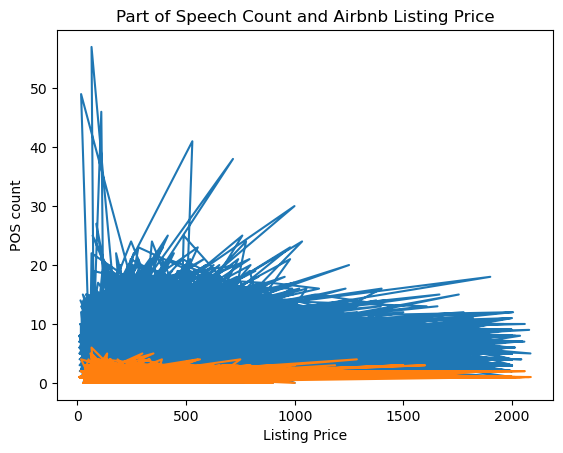

In [31]:
x= listing_pos['price']
y1= listing_pos['name_TC']
y2= listing_pos['name_SC']

plt.plot(x, y1, label='name_word_count')
plt.plot(x, y2, label='name_sentence_count')
plt.title('Part of Speech Count and Airbnb Listing Price')
plt.xlabel('Listing Price')
plt.ylabel('POS count')

plt.show()

In [32]:
listing_pos_sample= listing_pos.sample(n=5000)

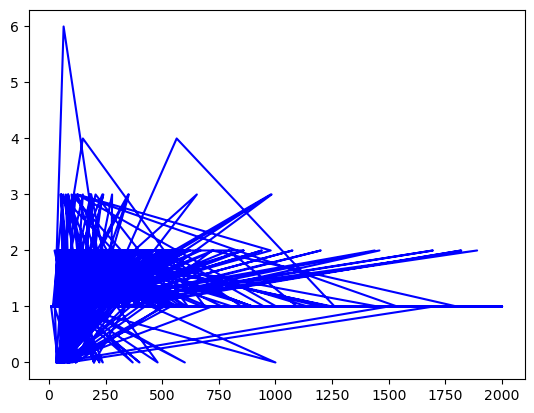

In [33]:
plt.plot(listing_pos_sample['price'], listing_pos_sample['name_SC'], color='blue')

In [41]:
median=pd.DataFrame(listing_pos.median())

In [44]:
median=median.transpose()

In [45]:
median.drop(columns=)

,Unnamed: 0,id,price,name_TC,name_SC,description_TC,description_SC,neighborhood_overview_TC,neighborhood_overview_SC,host_about_TC,...,noun_count_neighborhood_overview,noun_count_host_about,adj_count_name,adj_count_description,adj_count_neighborhood_overview,adj_count_host_about,verb_count_host_about,verb_count_name,verb_count_description,verb_count_neighborhood_overview
0,22606.5,45173650.0,150.0,7.0,1.0,155.0,7.0,14.0,1.0,10.0,...,4.0,2.0,1.0,13.0,1.0,0.0,1.0,0.0,10.0,0.0


ValueError: x and y must have same first dimension, but have shapes (45214,) and (1,)

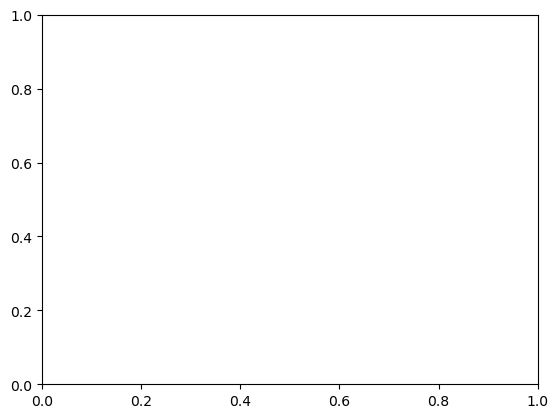

In [46]:
x= listing_pos['price']
y1= median['name_TC']
y2= median['name_SC']

plt.plot(x, y1, label='name_word_count')
plt.plot(x, y2, label='name_sentence_count')
plt.title('Part of Speech Count and Airbnb Listing Price')
plt.xlabel('Listing Price')
plt.ylabel('POS count')

plt.show()

In [40]:
listing_pos['price'].median()

150.0

In [47]:
import numpy as np

In [48]:
bins=[0,150,1000, np.inf]
labels =['low-end', 'middle', 'high-end']
listing_pos['price_category']= pd.cut(listing_pos['price'], bins=bins, labels=labels)

In [50]:
low_end= listing_pos[listing_pos['price_category'] =='low-end']
middle= listing_pos[listing_pos['price_category'] =='middle']
high_end= listing_pos[listing_pos['price_category'] =='high-end']

In [52]:
low_end

,Unnamed: 0,id,price,name_TC,name_SC,description_TC,description_SC,neighborhood_overview_TC,neighborhood_overview_SC,host_about_TC,...,noun_count_host_about,adj_count_name,adj_count_description,adj_count_neighborhood_overview,adj_count_host_about,verb_count_host_about,verb_count_name,verb_count_description,verb_count_neighborhood_overview,price_category
1,1,51307.0,75.0,10,2,184,17,21,2,59,...,16,0,23,5,5,2,0,7,2,low-end
2,2,184314.0,125.0,8,1,170,15,51,3,13,...,4,2,34,4,0,0,1,8,2,low-end
4,4,109.0,115.0,7,1,171,11,0,0,281,...,74,3,33,0,14,24,1,8,0,low-end
5,5,185536.0,85.0,9,1,209,14,0,0,7,...,0,4,18,0,0,0,0,12,0,low-end
6,6,2708.0,93.0,9,1,136,5,118,10,31,...,6,3,15,7,7,3,1,11,5,low-end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,45207,17639580.0,145.0,10,1,57,4,49,3,0,...,0,1,6,3,0,0,1,10,4,low-end
45209,45209,26665862.0,60.0,5,1,172,6,87,7,0,...,0,0,22,3,0,0,0,7,4,low-end
45210,45210,26898605.0,104.0,6,1,160,7,68,2,185,...,42,1,16,7,12,22,2,14,4,low-end
45211,45211,26895703.0,134.0,8,1,186,11,68,5,14,...,1,3,16,6,1,3,0,18,3,low-end


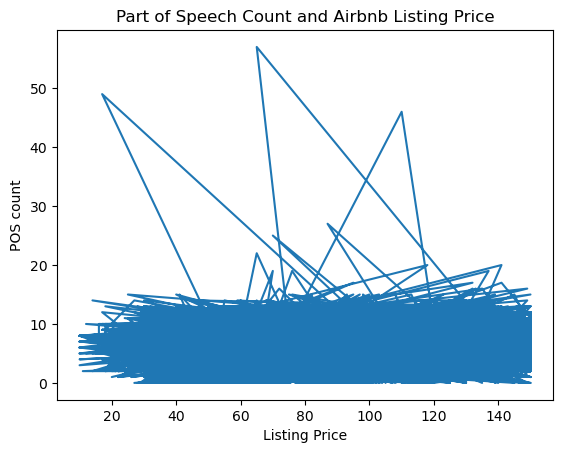

In [56]:
x= low_end['price']
y1= low_end['name_TC']
#y2= listing_pos['name_SC']

plt.plot(x, y1, label='name_word_count')
#plt.plot(x, y2, label='name_sentence_count')
plt.title('Part of Speech Count and Airbnb Listing Price')
plt.xlabel('Listing Price')
plt.ylabel('POS count')

plt.show()

In [135]:
average_count= pd.DataFrame(listing_pos.mean().round())

C:\Users\Christine\AppData\Local\Temp\ipykernel_3188\323589096.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_count= pd.DataFrame(listing_pos.mean().round())


In [150]:
listing_pos.columns

Index(['Unnamed: 0', 'id', 'price', 'name_TC', 'name_SC', 'description_TC',
       'description_SC', 'neighborhood_overview_TC',
       'neighborhood_overview_SC', 'host_about_TC', 'host_about_SC',
       'noun_count_name', 'noun_count_description',
       'noun_count_neighborhood_overview', 'noun_count_host_about',
       'adj_count_name', 'adj_count_description',
       'adj_count_neighborhood_overview', 'adj_count_host_about',
       'verb_count_host_about', 'verb_count_name', 'verb_count_description',
       'verb_count_neighborhood_overview', 'price_category'],
      dtype='object')

In [139]:
average_count=pd.DataFrame(average_count.astype(int))

In [151]:
average_count.reset_index(inplace=True)

In [152]:
average_count

,index,0
0,name_TC,7
1,name_SC,1
2,description_TC,129
3,description_SC,7
4,neighborhood_overview_TC,37
5,neighborhood_overview_SC,2
6,host_about_TC,43
7,host_about_SC,3
8,noun_count_name,2
9,noun_count_description,37


In [141]:
average_count= average_count.drop('Unnamed: 0', axis= 0)

In [142]:
average_count= average_count.drop('id', axis= 0)

In [147]:
average_count= average_count.drop('price', axis= 0)

In [163]:
average_count= average_count.sort_values(0, ascending=False)

In [165]:
average_count.rename(columns= {'index': 'POS/Sentence/Word', 0: 'Count'}, inplace=True)

In [172]:
average_count

,POS/Sentence/Word,Count
2,description_TC,129
6,host_about_TC,43
9,noun_count_description,37
4,neighborhood_overview_TC,37
13,adj_count_description,13
10,noun_count_neighborhood_overview,10
18,verb_count_description,10
11,noun_count_host_about,9
0,name_TC,7
3,description_SC,7


Text(0, 0.5, 'Average Count')

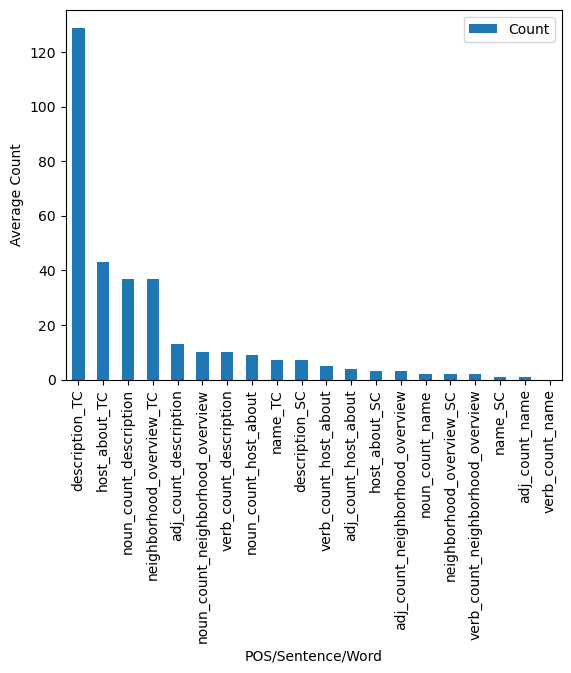

In [175]:
bar=average_count.plot(x='POS/Sentence/Word', y='Count', kind='bar')
bar.set_ylabel('Average Count')

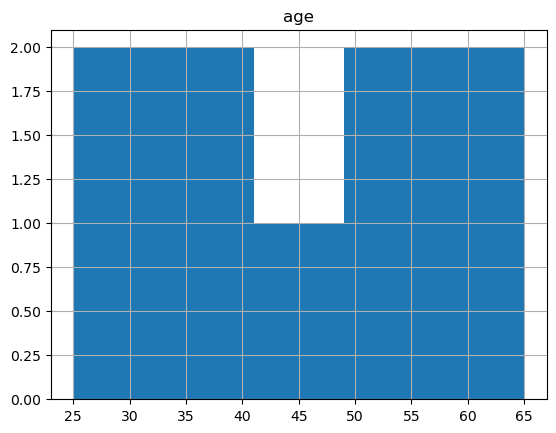

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataframe
df = pd.DataFrame({'age': [25, 30, 35, 40, 45, 50, 55, 60, 65]})

# Plot a histogram of the 'age' column
df.hist(column='age', bins=5)

# Display the histogram
plt.show()


In [128]:
x=average_count.transpose

In [129]:
x

<bound method DataFrame.transpose of                                     0
price                             232
name_TC                             7
name_SC                             1
description_TC                    129
description_SC                      7
neighborhood_overview_TC           37
neighborhood_overview_SC            2
host_about_TC                      43
host_about_SC                       3
noun_count_name                     2
noun_count_description             37
noun_count_neighborhood_overview   10
noun_count_host_about               9
adj_count_name                      1
adj_count_description              13
adj_count_neighborhood_overview     3
adj_count_host_about                4
verb_count_host_about               5
verb_count_name                     0
verb_count_description             10
verb_count_neighborhood_overview    2>

In [131]:
plt.hist(x['price'])

TypeError: 'method' object is not subscriptable